In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import scipy.stats as stats

In [ ]:
import numpy as np


In [3]:
# supporter functions

def Log_trans(x):
    return( np.log10(x) )

def Exp_trans(x):
    return( 10**x)

In [4]:
def Gaussian_func(tun_pref, tun_sharp, xlims, stepsize, tun_peak=1):
    """input parameters of gaussian function
    input:  tun_pref=tuning prefference
            tun_sharp=tuning sharpness
            xlim=bounds of tuning
            stepsize=step size of x
    optional in: tun_peak=the peak of the tuning
    output: return np.array for x and y
    """
    # define x and y arrays
    return_x = np.arange(xlims[0], xlims[1]+stepsize, stepsize)
    return_y = np.zeros(return_x.shape[0])
    
    # get y value for each step x
    for x in range(return_x.shape[0]):
        return_y[x] = Gaussian_point(tun_pref, tun_sharp, return_x[x], tun_peak=tun_peak)

    return(return_x, return_y) # return x and y array


def Gaussian_point(tun_pref, tun_sharp, x, tun_peak=1):
    """Get y / hight on gaussian for a certain x
    input: tun_pref=tuning prefference
           tun_sharp=tuning sharpness
           x=x to calculate
    return: y value for that x"""
    return(tun_peak * np.exp(-((x-tun_pref)**2)/(2*tun_sharp**2)))

In [5]:
x, y = Gaussian_func(1, 1, [1, 6], 1)

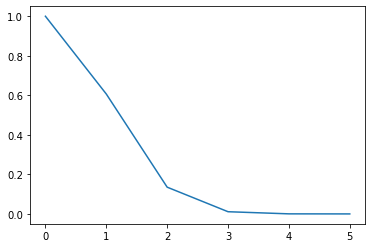

In [6]:
plt.plot(y)

In [7]:
def Double_exp_decay_func(afast, tfast, aslow, tslow, xlims, stepsize):
    """input parameters of double exponential decay and returns and x and y array
    input:  afast: magnitude of fast adaptation
            tfast: recovery of fast adaptation
            aslow: magnitde of slow adaptation
            tslow: recovery of slow adaptation
    output: return np.array for x and y
    """
    # define x and y arrays
    return_x = np.arange(xlims[0], xlims[1]+stepsize, stepsize)
    return_y = np.zeros(return_x.shape[0])
    
    # get y value for each step x
    for x in range(return_x.shape[0]):
        return_y[x] = 1 - (afast * np.exp(-(return_x[x]-1)/tfast)) - (aslow * np.exp(-(return_x[x]-1)/tslow))
    
    return(return_x, return_y) # return x and y array

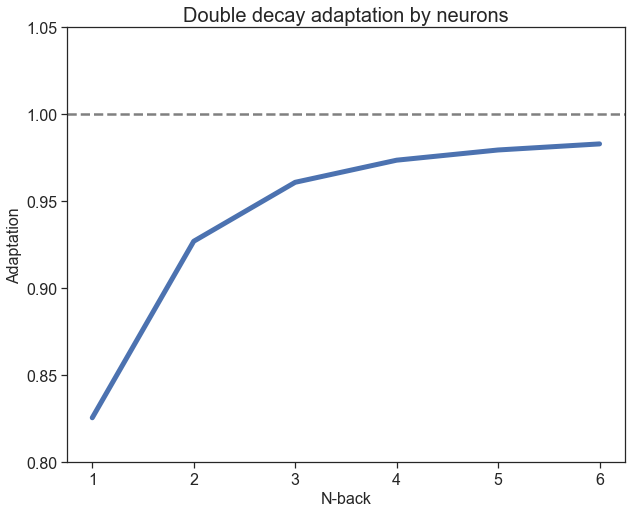

In [8]:
# set parameters for double exp decay
afast = 0.1399 
tfast = 0.85
aslow = 0.0345
tslow = 6.82

# set bounds and stepsize
decay_bounds = [1,6]
decay_stepsize = 1   # because we are interested in stimuli, keep this on 1

# get decay arrays
x_decay, y_decay = Double_exp_decay_func(afast, tfast, aslow, tslow, decay_bounds, decay_stepsize)



figsize(10, 8)
sns.set_theme(style="ticks")

# create lineplots for both tuning functions
g = sns.lineplot(x=x_decay, 
                 y=y_decay, 
                 lw=5)

plt.title("Double decay adaptation by neurons", fontsize=20)
plt.ylabel("Adaptation", fontsize=16)
plt.xlabel("N-back", fontsize=16)
plt.axhline(1, color='grey', lw=2.5, ls='--')
plt.ylim([0.80, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [251]:
# set parameters for double exp decay
afast = 0.1399 
tfast = 0.85
aslow = 0.0345
tslow = 6.82

# set bounds and stepsize
decay_bounds = [1,6]
decay_stepsize = 1   # because we are interested in stimuli, keep this on 1


def plot_decay(x_decay, y_decay):
    """plot/visualize the decay function"""

    # get decay arrays
    x_decay, y_decay = Double_exp_decay_func(afast, tfast, aslow, tslow, decay_bounds, decay_stepsize)

    # set figure size and plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = plt.plot(x_decay, y_decay, lw=5)

    # pimp plot
    plt.title("Double decay adaptation by neurons", fontsize=20)
    plt.ylabel("Adaptation", fontsize=16)
    plt.xlabel("N-back", fontsize=16)
    plt.axhline(1, color='grey', lw=2.5, ls='--')
    plt.ylim([0.80, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    return(ax)

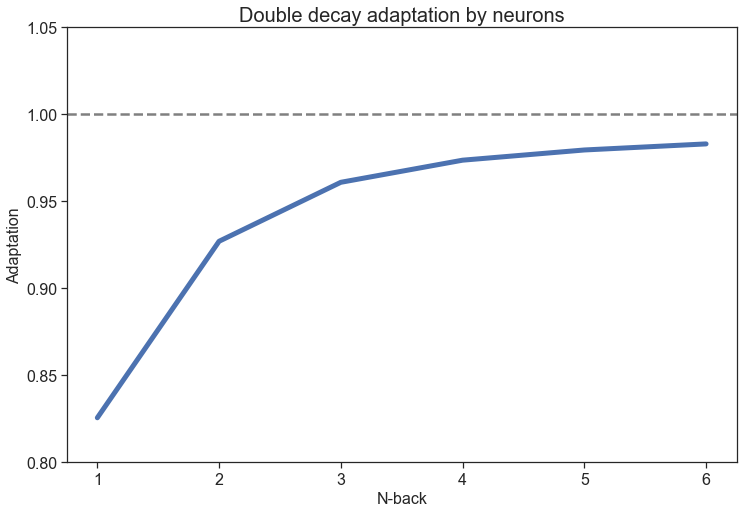

In [252]:
plot_decay(x_decay, y_decay)

In [9]:
def stim_adaptation_binary(stim_train, y_decay):
    """Input a stimulus train of some length and n-back decay array,
    then return per stimulus adaptation (multiplicative and full array)
    input: stim_train: the n long stim train
           y_decay: n-back array from decay function
    returns: total_adapt: multiplicative adaptation per stim [length stim train]
             adapt_matrix: complete adaptation matrix [length stim train  *  number of N-backs]
    note** this is a legacy function, relying on a boolean activation arrray (1/0)"""

    adapt_matrix = np.zeros([len(stim_train), len(y_decay)])   # make empty matrix of train length by number of N-backs 
    total_adapt = np.zeros(len(stim_train))                    # make empty array of stim train length

    # loop over stimuli starting at N+1
    for stim in range(0, len(stim_train)):

        # create a temp nback array to indicate adoptation
        n_back_array = np.zeros(len(y_decay))

        # for the first few stimulus (to avoid wrapping)
        if stim <= len(y_decay): 
            # populate Nback array with boolean, starting from right most (n-1)
            n_back_array[:stim] = (stim_train[:stim] == stim_train[stim]).astype(int)[::-1]
            
        else: 
            # populate Nback array with boolean, starting from right most (n-1)
            n_back_array[:] = (stim_train[stim-len(y_decay):stim] == stim_train[stim]).astype(int)[::-1]

        # populate our return arrays
        n_back_array *= y_decay                                      # multiply boolean array by decay array (1 encoding) 
        adapt_matrix[stim,:] = n_back_array                          # full length by N-backs array
        total_adapt[stim] = np.prod(n_back_array[n_back_array > 0])  # multiplicative adaptation

    return(total_adapt, adapt_matrix)

In [10]:
stim_train = np.array([3] * 50)
stim_train[1] = 0 
stim_train[2] = 2
stim_train[3] = 2.8
stim_train[4] = 1
stim_train[5] = 0 
stim_train[6] = 5
stim_train[7] = 1
stim_train[8] = 1.5

In [11]:
x,y = stim_adaptation_binary(stim_train, y_decay)

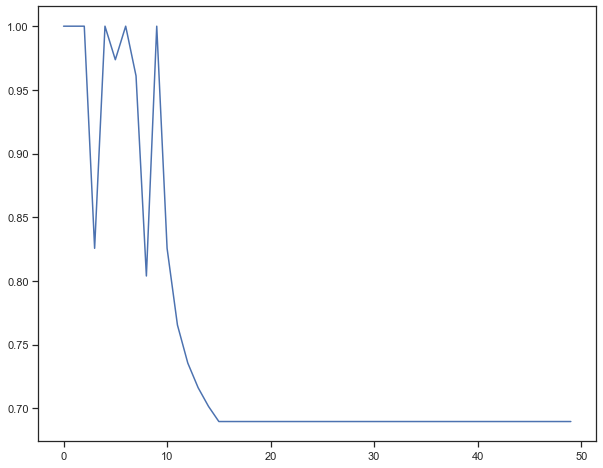

In [12]:
plt.plot(x)

In [213]:
def gaussian_activations(tun_pref, tun_sharp, x_array, tun_peak=1):
    """Get y / hight on gaussian for a certain x array
    input: tun_pref=tuning prefference
           tun_sharp=tuning sharpness
           x=x array to calculate
    return: y value for that x"""
    return(tun_peak * np.exp(-((x_array-tun_pref)**2)/(2*tun_sharp**2)))


def stim_adaptation(stim_train, y_decay, 
                    tun_pref, tun_sharp, tun_peak=1):
    """Input a stimulus train of some length and n-back decay array,
    then return per stimulus adaptation (multiplicative and full array)
    input: stim_train: the n long stim train
           y_decay: n-back array from decay function
    returns: total_adapt: multiplicative adaptation per stim [length stim train]
             adapt_matrix: complete adaptation matrix [length stim train  *  number of N-backs]"""
    
    # set up matrixes
    total_adapt = np.zeros(len(stim_train))                    # make empty array of stim train length
    n_back_array  =  np.zeros([len(stim_train), len(y_decay)+1])  # zet activation array
    
    # caclulate raw (no adaptation, activations) / exitability
    activations = gaussian_activations(tun_pref, tun_sharp, stim_train, tun_peak=tun_peak)
    
    # loop over number of n_back steps and fill in n_back array 
    for nback in range(len(y_decay)+1):
        n_back_array[:,nback] = np.roll(np.append(np.zeros(len(y_decay)), activations), nback)[len(y_decay):]
        
    # calculate the activation and multiply for overal adaptation
    n_back_array = 1-(n_back_array[:,1:] * (1-y_decay))   # full length by N-backs array (same as new n_back)
    total_adapt = np.prod(n_back_array, axis=1)           # multiplicative adaptation

    return(total_adapt, n_back_array)

In [232]:
def create_adaptation_dict(stim_train, y_decay, pref_range, sharp_range):
    """Input a stimulus train of some length, a n_back decay array, 
    the prefference (neuron) array range, the sharpness array range
    input:  stim_train: the n long stim train
            y_decay: n-back array from decay function
            pref_range: an array with the prefferences of specific neurons 
                        (to get adaptation in that situation)
            sharp_range: an array with the sharpnesses of the pref_range neurons
    returns: the adaptation dictonary with adapt_dict[prefferences][sharpnesses]"""
    
    # predefine a dictionary to store all prefferences and sharpnesses
    adapt_dict = {}
    
    # loop over prefferences
    for pref in pref_range:
        adapt_dict[pref] = {}    # nest dictonary to store sharpness
        # loop over sharpnesses
        for sharp in sharp_range:
            # run main stim_adaptation function
            adapt_dict[pref][sharp], _ = stim_adaptation(stim_train, y_decay, pref, sharp)
            
    return(adapt_dict)
        
        
        

In [230]:
np.arange(0.5,5.5, 0.5)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [231]:
pref_range  = np.arange(1,20.25, 0.25)
sharp_range = np.arange(0.5,5.5, 0.5)

abc = create_adaptation_dict(stim_train, y_decay, pref_range, sharp_range)

abc

{1.0: {0.5: array([1.        , 1.        , 0.97639753, 0.99012932, 0.97123951,
         0.96331567, 0.98217214, 0.98889801, 0.82038127, 0.92237599,
         0.93613055, 0.96406512, 0.97436925, 0.97953402, 0.99717322,
         0.99767978, 0.9999284 , 0.9999082 , 0.99995558, 0.99997238,
         0.99998431, 0.99998745, 0.9999358 , 0.99997553, 0.99998691,
         0.99999117, 0.97639083, 0.99012368, 0.99465911, 0.99641305,
         0.99716017, 0.99767097, 0.97637804, 0.99011494, 0.99465228,
         0.99640738, 0.99716017, 0.97412347, 0.99010956, 0.99470286,
         0.99643059, 0.99722589, 0.99770419, 1.        , 0.97639753,
         0.99012932, 0.97123951, 0.98660191, 0.99196349, 0.9941498 ,
         0.99723156, 0.99770419, 1.        , 1.        , 0.99994149,
         0.99997553, 0.99998691, 0.99999117, 0.99999314, 0.99999431,
         0.8256    , 0.92701074, 0.96088611, 0.97363939, 0.97952241,
         0.98302073, 0.99998744, 0.99999431, 1.        , 1.        ,
         1.        , 0.9

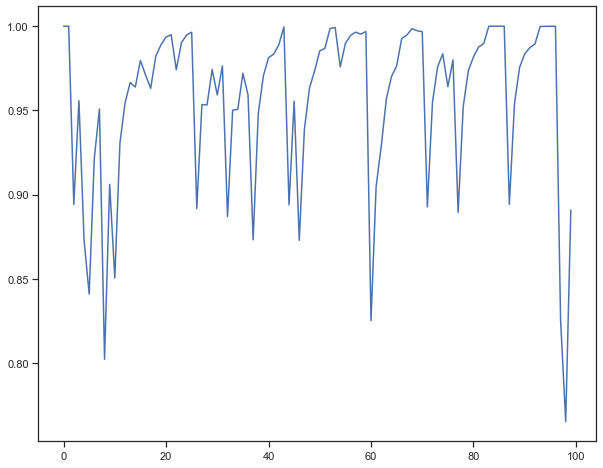

In [234]:
plt.plot(abc[1][1])

In [285]:
def plot_adaptation(tun_pref, tun_sharp, stim_train, y_decay, tun_peak=1):
    """plot/visualize the decay function"""

    # calculate activation, adaptation and adaptation weighted activation
    raw_act     = gaussian_activations(tun_pref, tun_sharp, stim_train, tun_peak=tun_peak)
    adapt, _    = stim_adaptation(stim_train, y_decay, tun_pref, tun_sharp)
    adapted_act = adapt * raw_act
    
    # set figure size and plot
    fig, ax = plt.subplots(2, 
                           1, 
                           sharex=True, 
                           figsize=(12, 8), 
                           gridspec_kw={'height_ratios': [3, 1]})
    
    # plot activations
    ax[0].plot(raw_act,     lw=2.5, alpha=0.8, label='non-adapted activation')
    ax[0].plot(adapted_act, lw=2.5, alpha=0.8, label='adapted activation')
    
    # plot adaptation
    ax[1].plot(adapt, lw=2.5)

    # pimp activation
    ax[0].legend(fontsize=16, loc=1)
    ax[0].set_ylabel('Activation', fontsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].set_title('Adapted and non-adapted activation over stimuli', fontsize=18)
    
    # pimp adaptation
    ax[1].set_ylabel('Adaptation', fontsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].set_title('Neuron adaptation', fontsize=18)
    ax[1].axhline(1, color='grey', lw=2, ls='--', alpha=0.5)
    
    # pimp layout
    plt.xlabel('Trial nr.', fontsize=16)
    plt.xticks(fontsize=16)
    plt.suptitle('Stimuli adaptation', fontsize=22)
    plt.tight_layout()
    
    return(ax)

array([<AxesSubplot:title={'center':'Adapted and non-adapted activation over stimuli'}, ylabel='Activation'>,
       <AxesSubplot:title={'center':'Neuron adaptation'}, xlabel='Trial nr.', ylabel='Adaptation'>],
      dtype=object)

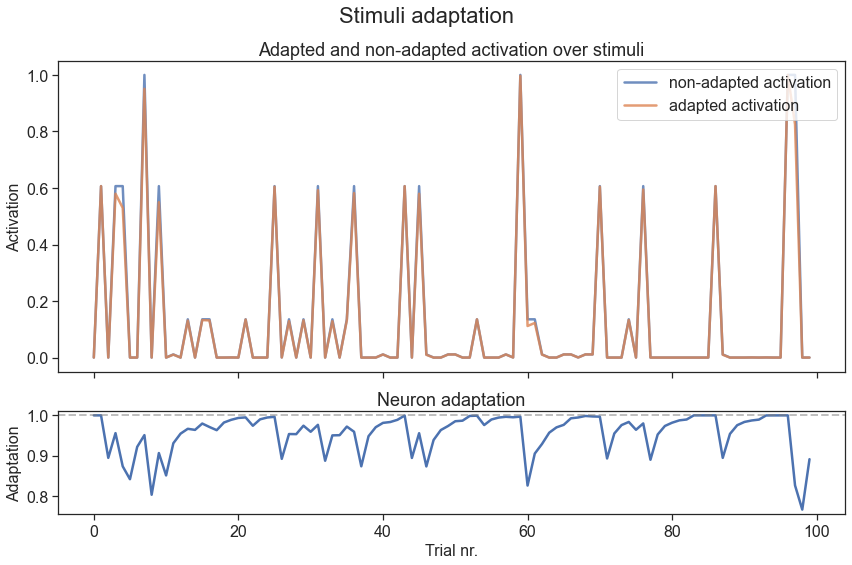

In [286]:
plot_adaptation(1, 1, stim_train, y_decay)

In [290]:
raw_act

array([3.72665317e-06, 6.06530660e-01, 2.28973485e-11, 6.06530660e-01,
       6.06530660e-01, 2.28973485e-11, 1.92874985e-22, 1.00000000e+00,
       2.28973485e-11, 6.06530660e-01, 1.52299797e-08, 1.11089965e-02,
       1.26641655e-14, 1.35335283e-01, 1.52299797e-08, 1.35335283e-01,
       1.35335283e-01, 1.26641655e-14, 3.72665317e-06, 3.35462628e-04,
       1.52299797e-08, 1.35335283e-01, 1.92874985e-22, 3.72665317e-06,
       2.57675711e-18, 6.06530660e-01, 3.35462628e-04, 1.35335283e-01,
       1.52299797e-08, 1.35335283e-01, 1.52299797e-08, 6.06530660e-01,
       3.72665317e-06, 1.35335283e-01, 1.52299797e-08, 1.35335283e-01,
       6.06530660e-01, 1.26641655e-14, 2.28973485e-11, 3.72665317e-06,
       1.11089965e-02, 1.92874985e-22, 2.28973485e-11, 6.06530660e-01,
       2.57675711e-18, 6.06530660e-01, 1.11089965e-02, 1.26641655e-14,
       3.72665317e-06, 1.11089965e-02, 1.11089965e-02, 2.28973485e-11,
       1.26641655e-14, 1.35335283e-01, 3.72665317e-06, 2.57675711e-18,
      

In [298]:
corrMatrix*100

,Raw_activation,Adapted_activation
Raw_activation,100.00000,99.77752
Adapted_activation,99.77752,100.00000


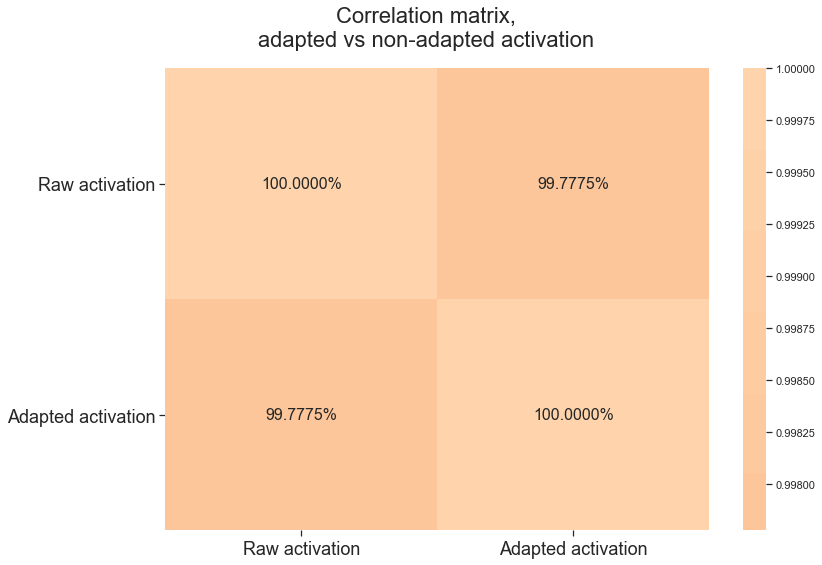

In [329]:
tun_pref  = 1
tun_sharp = 1
tun_peak  = 1

def plot_adaptation_corr(tun_pref, tun_sharp, stim_train, y_decay, tun_peak=1):
    """plot/visualize the correlation matrix of adapted vs non-adapted activation"""

    # calculate activation, adaptation and adaptation weighted activation
    raw_act     = gaussian_activations(tun_pref, tun_sharp, stim_train, tun_peak=tun_peak)
    adapt, _    = stim_adaptation(stim_train, y_decay, tun_pref, tun_sharp)
    adapted_act = adapt * raw_act

    # put adapted and non adapted activation into a dictionary
    data = {'Raw activation': raw_act,
            'Adapted activation': adapted_act}

    # get dataframe and get correlation matrix
    df = pd.DataFrame(data, columns=['Raw activation', 'Adapted activation'])
    corrMatrix = df.corr()

    # set figure size 
    fig, ax = plt.subplots(figsize=(12, 8))

    # make heatmap
    ax = sns.heatmap(corrMatrix, annot=True, fmt='.4%', center=.95, annot_kws={"size": 16})

    # pimp layout
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18, rotation=0)
    plt.suptitle('Correlation matrix,\nadapted vs non-adapted activation', fontsize=22)
    plt.tight_layout()

    return(ax)


In [ ]:
def plot_adaptation(tun_pref, tun_sharp, stim_train, y_decay, tun_peak=1):
    """plot/visualize the decay function"""

    # calculate activation, adaptation and adaptation weighted activation
    raw_act     = gaussian_activations(tun_pref, tun_sharp, stim_train, tun_peak=tun_peak)
    adapt, _    = stim_adaptation(stim_train, y_decay, tun_pref, tun_sharp)
    adapted_act = adapt * raw_act
    
    # set figure size and plot
    fig, ax = plt.subplots(2, 
                           1, 
                           sharex=True, 
                           figsize=(12, 8), 
                           gridspec_kw={'height_ratios': [3, 1]})
    
    # plot activations
    ax[0].plot(raw_act,     lw=2.5, alpha=0.8, label='non-adapted activation')
    ax[0].plot(adapted_act, lw=2.5, alpha=0.8, label='adapted activation')
    
    # plot adaptation
    ax[1].plot(adapt, lw=2.5)

    # pimp activation
    ax[0].legend(fontsize=16, loc=1)
    ax[0].set_ylabel('Activation', fontsize=16)
    ax[0].tick_params(axis='y', which='major', labelsize=16)
    ax[0].set_title('Adapted and non-adapted activation over stimuli', fontsize=18)
    
    # pimp adaptation
    ax[1].set_ylabel('Adaptation', fontsize=16)
    ax[1].tick_params(axis='y', which='major', labelsize=16)
    ax[1].set_title('Neuron adaptation', fontsize=18)
    ax[1].axhline(1, color='grey', lw=2, ls='--', alpha=0.5)
    
    # pimp layout
    plt.xlabel('Trial nr.', fontsize=16)
    plt.xticks(fontsize=16)
    plt.suptitle('Stimuli adaptation', fontsize=22)
    plt.tight_layout()
    
    return(ax)

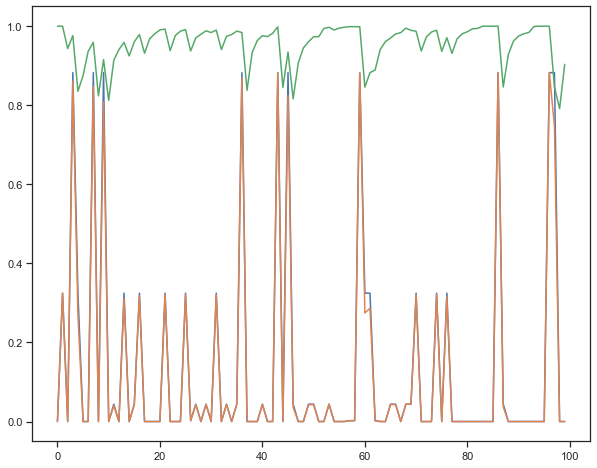

In [233]:


x, y = stim_adaptation(stim_train, y_decay, 0.5, 1)

# we have to multiply normal activation with this
raw_act = gaussian_activations(0.5, 1, stim_train, tun_peak=1)
x1 = x * raw_act

plt.plot(raw_act)
plt.plot(x1)
plt.plot(x)

In [210]:
stim_train = np.rand

AttributeError: module 'numpy' has no attribute 'rand'

In [183]:
stim_train = np.random.randint(1, 20, size=100)-10

In [184]:
x

array([1.        , 0.83327404, 0.76884364, 0.74396397, 0.72263705,
       0.7075351 , 0.69337695, 0.6943792 , 0.69842449, 0.69315786,
       0.69793569, 0.69388435, 0.69270156, 0.69424505, 0.69443229,
       0.69834891, 0.69594274, 0.69551963, 0.69546923, 0.69890593,
       0.69662668, 0.69279954, 0.69149508, 0.69156447, 0.69709729,
       0.6923614 , 0.69381319, 0.69229401, 0.69111684, 0.69135805,
       0.69097359, 0.69320295, 0.69096427, 0.69673364, 0.69892361,
       0.69646897, 0.69586461, 0.69558289, 0.69275845, 0.6942234 ,
       0.69799162, 0.6937946 , 0.6924361 , 0.69111433, 0.69712013,
       0.69557302, 0.6984704 , 0.69342484, 0.69183501, 0.69195605,
       0.6971584 , 0.69265045, 0.6916511 , 0.69718137, 0.69355046,
       0.69461247, 0.6945988 , 0.69844764, 0.69351041, 0.69443781,
       0.69201571, 0.69744548, 0.69932129, 0.69995443, 0.69428338,
       0.69872231, 0.69470226, 0.69299075, 0.69208162, 0.69073499,
       0.69115329, 0.69081937, 0.69013906, 0.68988954, 0.68976

In [173]:
raw_act

array([0.04393693, 0.8824969 , 0.04393693, 0.32465247, 0.32465247,
       0.8824969 , 0.32465247, 0.04393693, 0.8824969 , 0.04393693,
       0.8824969 , 0.8824969 , 0.32465247, 0.32465247, 0.04393693,
       0.32465247, 0.32465247, 0.32465247, 0.04393693, 0.32465247,
       0.8824969 , 0.8824969 , 0.8824969 , 0.04393693, 0.8824969 ,
       0.32465247, 0.8824969 , 0.8824969 , 0.8824969 , 0.8824969 ,
       0.32465247, 0.8824969 , 0.04393693, 0.04393693, 0.32465247,
       0.32465247, 0.32465247, 0.8824969 , 0.32465247, 0.04393693,
       0.8824969 , 0.8824969 , 0.8824969 , 0.04393693, 0.32465247,
       0.04393693, 0.8824969 , 0.8824969 , 0.8824969 , 0.04393693,
       0.8824969 , 0.8824969 , 0.04393693, 0.8824969 , 0.32465247,
       0.32465247, 0.04393693, 0.8824969 , 0.32465247, 0.8824969 ,
       0.04393693, 0.04393693, 0.04393693, 0.8824969 , 0.04393693,
       0.8824969 , 0.8824969 , 0.8824969 , 0.8824969 , 0.8824969 ,
       0.8824969 , 0.8824969 , 0.8824969 , 0.8824969 , 0.88249

In [174]:
x1

array([0.04393693, 0.73536176, 0.03378063, 0.24152974, 0.2346059 ,
       0.62439753, 0.22510654, 0.03050889, 0.61635745, 0.03045523,
       0.61592609, 0.61235079, 0.22488727, 0.22538837, 0.03051123,
       0.2267207 , 0.22593953, 0.22580216, 0.03055679, 0.22690154,
       0.61477088, 0.61139345, 0.61024227, 0.03038522, 0.6151862 ,
       0.22477684, 0.61228799, 0.61094732, 0.60990847, 0.61012134,
       0.22432628, 0.61174946, 0.03035885, 0.03061234, 0.22690727,
       0.22611037, 0.22591416, 0.61384975, 0.22490574, 0.03050205,
       0.61597544, 0.61227158, 0.61107272, 0.03036544, 0.22632177,
       0.03056135, 0.61639797, 0.61194527, 0.61054225, 0.03040243,
       0.61524013, 0.61126188, 0.03038903, 0.6152604 , 0.22516287,
       0.22550765, 0.03051854, 0.61637788, 0.22514987, 0.61283922,
       0.03040505, 0.03064362, 0.03072603, 0.61770762, 0.03050468,
       0.61662028, 0.61307259, 0.61156219, 0.61075988, 0.60957149,
       0.60994064, 0.60964596, 0.60904559, 0.60882538, 0.60871